In [87]:
using PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

In [1]:
using Interact, Plots, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11262944725001025955\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-481658162417484092\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11262944725001025955\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2127989086146939533\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17205561549375628110\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2127989086146939533\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Package MEngProject does not have NNlib in its dependencies:
│ - If you have MEngProject checked out for development and have
│   added NNlib as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with MEngProject
└ Loading NNlib into MEngProject from project dependency, future warnings for MEngProject are suppressed.


In [28]:
img = convert(Array{Float64,2}, load("../input_img/Iine_100_100_gs.png"));

In [29]:
function plot_gs(img::AbstractArray, axMin = 0, axMax = 2)
    findmax(img)[1] > axMax && throw(ArgumentError(string("Image has max ", findmax(img)[1], ",outside range")))
    findmin(img)[1] < axMin && throw(ArgumentError(string("Image has min ", findmin(img)[1], ",outside range")))
    fig, ax = plt.subplots()

    im = ax.imshow(img, ,
               vmax=axMax, vmin=axMin)
  

    plt.axis("off")
    fig.tight_layout()
    plt.show()
end

LoadError: syntax: unexpected ","

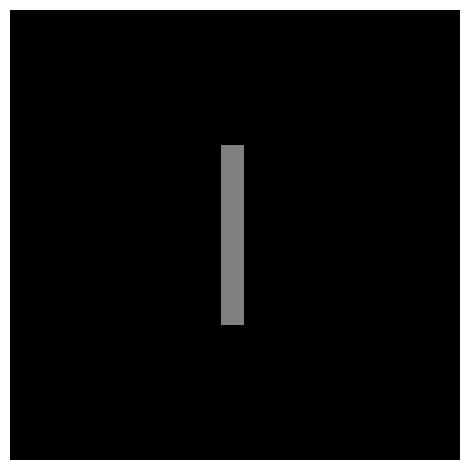

In [30]:
location = "1"
plot_gs(img, "img", false, 0, 2)

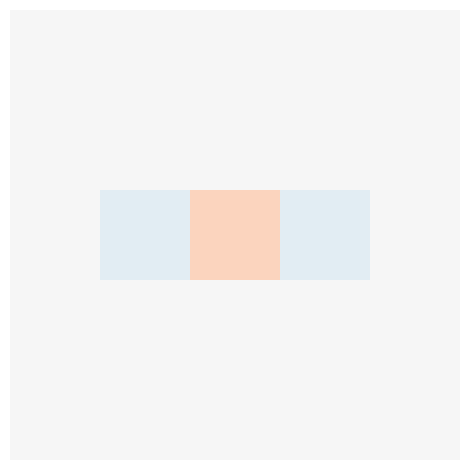

In [45]:
plot_gs(ImageFiltering.Kernel.DoG((.2,.4)),-1,1)

In [49]:
size(ImageFiltering.Kernel.DoG((0.2,0.4),(0.4,0.2)))

MethodError: MethodError: no method matching DoG(::Tuple{Float64,Float64}, ::Tuple{Float64,Float64})
Closest candidates are:
  DoG(::Tuple{Vararg{Real,N}}, ::Tuple{Vararg{Real,N}}, !Matched::Tuple{Vararg{Integer,N}}) where N at /Users/niallcullinane/.julia/packages/ImageFiltering/jhBno/src/kernel.jl:244
  DoG(::Tuple{Vararg{Real,N}}) where N at /Users/niallcullinane/.julia/packages/ImageFiltering/jhBno/src/kernel.jl:247

In [72]:
using ImageFiltering

In [79]:
Kernel.gaussian((10,10), (11,11))

11×11 OffsetArray(::Array{Float64,2}, -5:5, -5:5) with eltype Float64 with indices -5:5×-5:5:
 0.00709955  0.00742633  0.00769085  …  0.00769085  0.00742633  0.00709955
 0.00742633  0.00776814  0.00804484     0.00804484  0.00776814  0.00742633
 0.00769085  0.00804484  0.0083314      0.0083314   0.00804484  0.00769085
 0.00788554  0.0082485   0.00854231     0.00854231  0.0082485   0.00788554
 0.00800472  0.00837316  0.00867141     0.00867141  0.00837316  0.00800472
 0.00804484  0.00841513  0.00871487  …  0.00871487  0.00841513  0.00804484
 0.00800472  0.00837316  0.00867141     0.00867141  0.00837316  0.00800472
 0.00788554  0.0082485   0.00854231     0.00854231  0.0082485   0.00788554
 0.00769085  0.00804484  0.0083314      0.0083314   0.00804484  0.00769085
 0.00742633  0.00776814  0.00804484     0.00804484  0.00776814  0.00742633
 0.00709955  0.00742633  0.00769085  …  0.00769085  0.00742633  0.00709955

In [3]:
x=-2:.2:2
y=-2:.2:2

σ_2 = 0.5
δ = σ_2/2
K = 12;

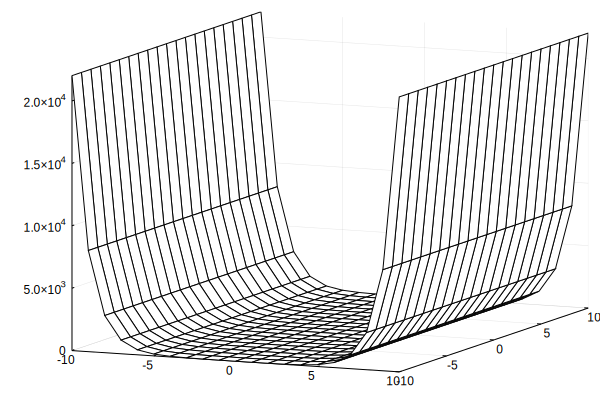

In [4]:
x=-10:1:10
y=-10:1:10
k=1
θ = π*(k-1)/K
#     G(x,y) = 1/(2*π*σ_2^2)*exp(-1/(2*σ_2^2)*(x^2+y^2))
d(x,y) = exp(-(x*cos(θ)+y*sin(θ))/2σ_2)-exp((x*cos(θ)+y*sin(θ))/2σ_2)
#     D_sep(x,y) = G(x,y)*exp(-1/8)*d(x,y)
d_sep_rp(x,y) = relu.(d(x,y))
d_sep_rm(x,y) = relu.(-d(x,y))
A(x,y) = d_sep_rp(x,y) + d_sep_rm(x,y)
B(x,y) = d_sep_rp(x,y) - d_sep_rm(x,y)
Plots.wireframe(x,y,A)
#     savefig(string("../out/func_plots/A_sca_1",k))

In [11]:
σ_a1=1
σ_a2=1
σ_b1=1
σ_b2=0.1

0.1

In [88]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 7,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
4, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/niallcullinane/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/niallcullinane/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/niallcullinane/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/niallcullinane/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/niallcullinane/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011747aad0, Task (runnable) @0x000000011747aad0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"1.0\",\"2.0\",\"3.0\",\"4.0\",\"5.0\",\"6.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"8390451440561605665\",\"id\":\"9341974103869911045\",\"type\":\"observable\"}),\"index\":We

In [42]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 

ErrorException: syntax: "((x * cos(θ)) - (y * sin(θ)))" is not a valid function argument name

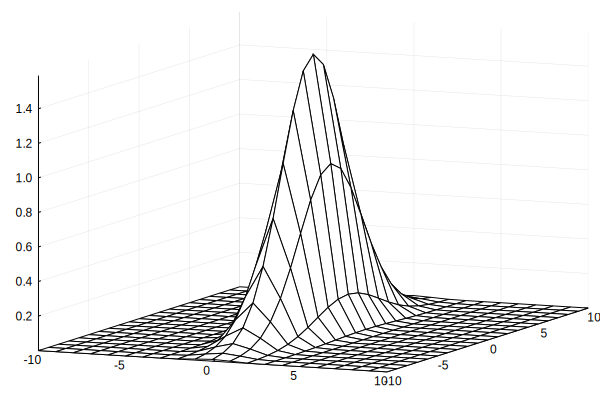

In [16]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 

In [8]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1
θ=π/4
@manipulate for θ in 0:2π
    G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp(-((x*cos(θ)-y*sin(θ))^2/2*σ_a1)-((x*sin(θ)+y*cos(θ))^2/2*σ_a2)) 

             
Plots.wireframe(x,y,G) 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 7,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
4, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/niallcullinane/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/niallcullinane/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/niallcullinane/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/niallcullinane/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/niallcullinane/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010eab0d90, Task (runnable) @0x000000010eab0d90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"1.0\",\"2.0\",\"3.0\",\"4.0\",\"5.0\",\"6.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"13480700140906346226\",\"id\":\"17121729751906971277\",\"type\":\"observable\"}),\"index\":

In [71]:
    G(x,y) = 1/(2*π*σ_2^2)*exp(-/(2*σ_2^2)*(x^2+y^2))
Plots.wireframe(x,y,G) 

MethodError: MethodError: no method matching /(::Float64)
Closest candidates are:
  /(::Float64, !Matched::Float64) at float.jl:407
  /(::R, !Matched::S) where {R<:Real, S<:Complex} at complex.jl:332
  /(::Union{Float16, Float32, Float64}, !Matched::BigFloat) at mpfr.jl:458
  ...

In [38]:
cos(pi/2)

6.123233995736766e-17

In [39]:
sin(pi/2)

1.0

In [49]:
R(x,y,θ)=((x*cos(θ)-y*sin(θ)), (x*sin(θ)+y*cos(θ))) 

R (generic function with 1 method)

In [ ]:
(x*cos(θ)-y*sin(θ))
(x*sin(θ)+y*cos(θ))

In [53]:
R(2,2,π/4)

(2.220446049250313e-16, 2.82842712474619)

In [55]:
√(2)+√2

2.8284271247461903

In [58]:
function fun_R(x,y,θ)
    (x*cos(θ)-y*sin(θ)), (x*sin(θ)+y*cos(θ))
end

fun_R (generic function with 1 method)

In [62]:
a = fun_R(1,0,pi)

(-1.0, 1.2246467991473532e-16)

In [63]:
type(a) 

UndefVarError: UndefVarError: type not defined

In [66]:
G(fun_R(x,y,pi))

MethodError: MethodError: no method matching G(::Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}})
Closest candidates are:
  G(::Any, !Matched::Any) at In[48]:7

In [67]:
fun_R(x,y,pi)

(10.000000000000002:-1.0000000000000002:-10.000000000000002, 9.999999999999998:-0.9999999999999999:-9.999999999999998)

In [68]:
fun_R(G(x,y),pi)

MethodError: MethodError: no method matching ^(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:885
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:155
  ...

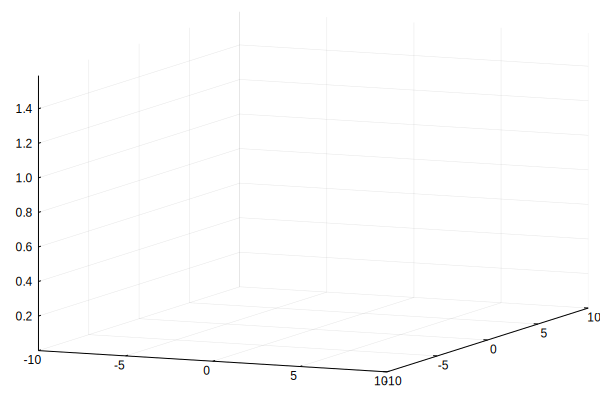

points not sorted in ascending order


In [83]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

θ=π/2
G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
xr = x*cos(θ)-y*sin(θ)
yr = x*sin(θ)+y*cos(θ)
Plots.wireframe(xr,yr,G) 

In [89]:
function fun_R(x,y,θ)
    x*cos(θ)-y*sin(θ), x*sin(θ)+y*cos(θ)
end

fun_R (generic function with 1 method)

In [90]:
fun_R(1,0,pi)

(-1.0, 1.2246467991473532e-16)

In [91]:
G(1,0)

0.9653235263005392

In [92]:
G(fun_R(1,0,pi))

MethodError: MethodError: no method matching G(::Tuple{Float64,Float64})
Closest candidates are:
  G(::Any, !Matched::Any) at In[83]:7

In [93]:
θ=pi
G(x*cos(θ)-y*sin(θ), x*cos(θ)-y*sin(θ))

MethodError: MethodError: no method matching ^(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:885
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:155
  ...

In [94]:
G(x,y)

MethodError: MethodError: no method matching ^(::StepRange{Int64,Int64}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:885
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:155
  ...